<h1>Introduction/Business Problem</h1>

Today, we are interested in New York City as a pet haven. According to a blog on the Internet, New York residents own over an estimated 1 million pets while around 600,000 are dogs. 

Another statistics show that there is one pet for every three households in the NYC. Over half of them are dogs.

Since dogs are creatures which need to do exercises and walk around outdoors to be healthy, we are interested in looking for the best place to live as a dog owner in NYC.
I would pick Brooklyn as the borough for investigation, because I like the fictional character Captain of America and Brooklyn was his home town.

This problem is particularly important for dog owners as picking a friendly neighborhood for dogs will be highly beneficial, i.e. parks, trails, waterfronts, etc.

<b>Here we are, we are going to answer the following question.

Which neighborhood in Brooklyn is suitable for petting dogs and therefore the best place for dog lovers to live in? </b>

<h1>Data</h1>

Before we get the data and start exploring it, let's download all the dependencies that we will need.

In [2]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    openssl-1.1.1g             |       h516909a_1         2.1 MB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    ------------------------------------------------------------
                       

In [3]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

Data downloaded!


In [4]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [5]:
neighborhoods_data = newyork_data['features']

In [6]:
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

In [7]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [8]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [9]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


In [10]:
neighborhoods.Borough.unique()

array(['Bronx', 'Manhattan', 'Brooklyn', 'Queens', 'Staten Island'],
      dtype=object)

In [11]:
brooklyn_data = neighborhoods[neighborhoods['Borough'] == 'Brooklyn'].reset_index(drop=True)
brooklyn_data

,Borough,Neighborhood,Latitude,Longitude
0,Brooklyn,Bay Ridge,40.625801,-74.030621
1,Brooklyn,Bensonhurst,40.611009,-73.995180
2,Brooklyn,Sunset Park,40.645103,-74.010316
3,Brooklyn,Greenpoint,40.730201,-73.954241
4,Brooklyn,Gravesend,40.595260,-73.973471
5,Brooklyn,Brighton Beach,40.576825,-73.965094
6,Brooklyn,Sheepshead Bay,40.586890,-73.943186
7,Brooklyn,Manhattan Terrace,40.614433,-73.957438
8,Brooklyn,Flatbush,40.636326,-73.958401
9,Brooklyn,Crown Heights,40.670829,-73.943291


In [12]:
# The code was removed by Watson Studio for sharing.

In [13]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [14]:
radius = 500
LIMIT = 100
brooklyn_venues = getNearbyVenues(names=brooklyn_data['Neighborhood'],
                                   latitudes=brooklyn_data['Latitude'],
                                   longitudes=brooklyn_data['Longitude']
                                  )

Bay Ridge
Bensonhurst
Sunset Park
Greenpoint
Gravesend
Brighton Beach
Sheepshead Bay
Manhattan Terrace
Flatbush
Crown Heights
East Flatbush
Kensington
Windsor Terrace
Prospect Heights
Brownsville
Williamsburg
Bushwick
Bedford Stuyvesant
Brooklyn Heights
Cobble Hill
Carroll Gardens
Red Hook
Gowanus
Fort Greene
Park Slope
Cypress Hills
East New York
Starrett City
Canarsie
Flatlands
Mill Island
Manhattan Beach
Coney Island
Bath Beach
Borough Park
Dyker Heights
Gerritsen Beach
Marine Park
Clinton Hill
Sea Gate
Downtown
Boerum Hill
Prospect Lefferts Gardens
Ocean Hill
City Line
Bergen Beach
Midwood
Prospect Park South
Georgetown
East Williamsburg
North Side
South Side
Ocean Parkway
Fort Hamilton
Ditmas Park
Wingate
Rugby
Remsen Village
New Lots
Paerdegat Basin
Mill Basin
Fulton Ferry
Vinegar Hill
Weeksville
Broadway Junction
Dumbo
Homecrest
Highland Park
Madison
Erasmus


In [15]:
print(brooklyn_venues.shape)
brooklyn_venues.head()

(2775, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bay Ridge,40.625801,-74.030621,Pilo Arts Day Spa and Salon,40.624748,-74.030591,Spa
1,Bay Ridge,40.625801,-74.030621,Bagel Boy,40.627896,-74.029335,Bagel Shop
2,Bay Ridge,40.625801,-74.030621,Pegasus Cafe,40.623168,-74.031186,Breakfast Spot
3,Bay Ridge,40.625801,-74.030621,Leo's Casa Calamari,40.624200,-74.030931,Pizza Place
4,Bay Ridge,40.625801,-74.030621,Cocoa Grinder,40.623967,-74.030863,Juice Bar


In [16]:
brooklyn_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Bath Beach,47,47,47,47,47,47
Bay Ridge,80,80,80,80,80,80
Bedford Stuyvesant,28,28,28,28,28,28
Bensonhurst,36,36,36,36,36,36
Bergen Beach,6,6,6,6,6,6
Boerum Hill,90,90,90,90,90,90
Borough Park,22,22,22,22,22,22
Brighton Beach,43,43,43,43,43,43
Broadway Junction,21,21,21,21,21,21


In [17]:
print('There are {} uniques categories.'.format(len(brooklyn_venues['Venue Category'].unique())))

There are 288 uniques categories.


In [18]:
brooklyn_venues['Venue Category'].unique()

array(['Spa', 'Bagel Shop', 'Breakfast Spot', 'Pizza Place', 'Juice Bar',
       'Taco Place', 'Grocery Store', 'Caucasian Restaurant',
       'Middle Eastern Restaurant', 'Hookah Bar', 'Optical Shop',
       'Lounge', 'Sports Bar', 'Bookstore', 'Bar', 'Ice Cream Shop',
       'Greek Restaurant', 'Italian Restaurant', 'Sushi Restaurant',
       'Chinese Restaurant', 'Tea Room', 'American Restaurant', 'Café',
       'New American Restaurant', 'Video Game Store', 'Toy / Game Store',
       'Mexican Restaurant', 'Indian Restaurant', 'Department Store',
       'Lingerie Store', 'Seafood Restaurant', 'Thai Restaurant',
       'Sandwich Place', 'Vietnamese Restaurant', 'Clothing Store',
       'Pool Hall', 'Kids Store', 'Dim Sum Restaurant', 'Snack Place',
       'Pharmacy', 'Fast Food Restaurant', 'Gym / Fitness Center',
       'Mattress Store', 'Hotel', 'Supermarket', 'Yoga Studio',
       'Boutique', 'Mediterranean Restaurant', 'Electronics Store',
       'Playground', 'Park', 'Cosmetics 

We are going to use the following venue categories as places which are suitable for dogs.  These categories are found in Manhatten database on the lab session.  

'Dog Run', 'Park', 'Pet Café', 'Pet Service', 'Pet Store', 'Waterfront', 'Trail'


<h1> Here is the end of the part 1 of the Capstone</h1>

<h1>Methodology</h1>
<p> We are now trying to identify which kind of places are suitable for petting dogs.  As said, when I study the data in Manhatten and Brookyln, I have identified good choices such as 'Dog Run', 'Park', 'Pet Café', 'Pet Service', 'Pet Store', 'Waterfront', 'Trail'. We will use two approaches. First one we just simply use pivot tables, and the second one we will use clustering technique.</p>

In [129]:
#Due to the venue category also has value equal to neighborhood, I will rename column 'neighborhood' as 'neighbourhood' with a 'u'
brooklyn_venues.rename(columns={'Neighborhood': 'Neighbourhood'}, inplace=True)


Here we try to group ... into the column 'Suitable for dog owner'.

In [130]:
brooklyn_for_dog_owners = brooklyn_venues.copy(deep=True)
brooklyn_for_dog_owners.head()

,Neighbourhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bay Ridge,40.625801,-74.030621,Pilo Arts Day Spa and Salon,40.624748,-74.030591,Spa
1,Bay Ridge,40.625801,-74.030621,Bagel Boy,40.627896,-74.029335,Bagel Shop
2,Bay Ridge,40.625801,-74.030621,Pegasus Cafe,40.623168,-74.031186,Breakfast Spot
3,Bay Ridge,40.625801,-74.030621,Leo's Casa Calamari,40.624200,-74.030931,Pizza Place
4,Bay Ridge,40.625801,-74.030621,Cocoa Grinder,40.623967,-74.030863,Juice Bar


In [131]:
brooklyn_for_dog_owners['Suitable for Dogs'] = brooklyn_for_dog_owners['Venue Category'].isin(['Dog Run', 'Park', 'Pet Café', 'Pet Service', 'Pet Store', 'Waterfront', 'Trail'])
brooklyn_for_dog_owners[(brooklyn_for_dog_owners['Suitable for Dogs'] == True)]

,Neighbourhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Suitable for Dogs
79,Bay Ridge,40.625801,-74.030621,Fort Hamtilton Handball Court,40.625991,-74.036298,Park,True
98,Bensonhurst,40.611009,-73.995180,The Wholesome Pet,40.611359,-73.991463,Pet Store,True
100,Bensonhurst,40.611009,-73.995180,18th Ave Bench Park,40.610319,-73.999505,Park,True
105,Bensonhurst,40.611009,-73.995180,Milestone Park,40.609447,-73.999649,Park,True
426,East Flatbush,40.641718,-73.936103,Paerdegat Park,40.638137,-73.938138,Park,True
452,Kensington,40.642382,-73.980421,Dome Playground,40.639449,-73.979834,Park,True
496,Windsor Terrace,40.656946,-73.980073,Thomas J. Cuite Park,40.654339,-73.978756,Park,True
497,Windsor Terrace,40.656946,-73.980073,Seeley Park,40.653420,-73.977818,Park,True
591,Brownsville,40.663950,-73.910235,Steps To A Healthier Brownsville,40.664231,-73.907785,Trail,True
593,Brownsville,40.663950,-73.910235,Betsy Head Memorial Playground,40.663655,-73.913211,Park,True


In [132]:
brooklyn_for_dog_owners[(brooklyn_for_dog_owners['Suitable for Dogs'] == True)].shape[0]

64

In [133]:
brooklyn_for_dog_owners_grouped = brooklyn_for_dog_owners.groupby(by=['Neighbourhood','Suitable for Dogs']).size().reset_index()
brooklyn_for_dog_owners_grouped

,Neighbourhood,Suitable for Dogs,0
0,Bath Beach,False,46
1,Bath Beach,True,1
2,Bay Ridge,False,79
3,Bay Ridge,True,1
4,Bedford Stuyvesant,False,27
5,Bedford Stuyvesant,True,1
6,Bensonhurst,False,33
7,Bensonhurst,True,3
8,Bergen Beach,False,6
9,Boerum Hill,False,90


In [134]:
table = pd.pivot_table(brooklyn_for_dog_owners, index=['Neighbourhood','Suitable for Dogs'], aggfunc=np.size, )
table['% of Total'] = (table.Venue / table.Venue.sum() * 100).astype(str) + '%'
table['% of Neighbourhood'] = (table.Venue / table.groupby(level=0).Venue.transform(sum) * 100).astype(str) + '%'
table

Neighborhood Latitude  \
Neighbourhood             Suitable for Dogs                          
Bath Beach                False                               46.0   
                          True                                 1.0   
Bay Ridge                 False                               79.0   
                          True                                 1.0   
Bedford Stuyvesant        False                               27.0   
                          True                                 1.0   
Bensonhurst               False                               33.0   
                          True                                 3.0   
Bergen Beach              False                                6.0   
Boerum Hill               False                               90.0   
Borough Park              False                               22.0   
Brighton Beach            False                               43.0   
Broadway Junction         False                               21.0   
Brooklyn Heights          False                               94.0   
                          True                                 6.0   
Brownsville               False                               14.0   
                          True                                 2.0   
Bushwick                  False                               69.0   
                          True                                 1.0   
Canarsie                  False                                6.0   
Carroll Gardens           False                               99.0   
                          True                                 1.0   
City Line                 False                               33.0   
Clinton Hill              False                               92.0   
                          True                                 2.0   
Cobble Hill               False                               86.0   
                          True                                 3.0   
Coney Island              False                               16.0   
                          True                                 1.0   
Crown Heights             False                               24.0   
Cypress Hills             False                               22.0   
Ditmas Park               False                               52.0   
Downtown                  False                               99.0   
                          True                                 1.0   
Dumbo                     False                               62.0   
                          True                                 6.0   
Dyker Heights             False                                5.0   
East Flatbush             False                               11.0   
                          True                                 1.0   
East New York             False                               14.0   
East Williamsburg         False                               68.0   
Erasmus                   False                               24.0   
Flatbush                  False                               22.0   
Flatlands                 False                               17.0   
                          True                                 1.0   
Fort Greene               False                               64.0   
                          True                                 2.0   
Fort Hamilton             False                               69.0   
                          True                                 1.0   
Fulton Ferry              False                               52.0   
                          True                                10.0   
Georgetown                False                               27.0   
                          True                                 1.0   
Gerritsen Beach           False                               18.0   
Gowanus                   False                               65.0   
Gravesend                 False                        

In [135]:
table = table.reset_index()
table

,Neighbourhood,Suitable for Dogs,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Category,Venue Latitude,Venue Longitude,% of Total,% of Neighbourhood
0,Bath Beach,False,46.0,46.0,46,46,46.0,46.0,1.6576576576576578%,97.87234042553192%
1,Bath Beach,True,1.0,1.0,1,1,1.0,1.0,0.036036036036036036%,2.127659574468085%
2,Bay Ridge,False,79.0,79.0,79,79,79.0,79.0,2.846846846846847%,98.75%
3,Bay Ridge,True,1.0,1.0,1,1,1.0,1.0,0.036036036036036036%,1.25%
4,Bedford Stuyvesant,False,27.0,27.0,27,27,27.0,27.0,0.9729729729729729%,96.42857142857143%
5,Bedford Stuyvesant,True,1.0,1.0,1,1,1.0,1.0,0.036036036036036036%,3.571428571428571%
6,Bensonhurst,False,33.0,33.0,33,33,33.0,33.0,1.1891891891891893%,91.66666666666666%
7,Bensonhurst,True,3.0,3.0,3,3,3.0,3.0,0.10810810810810811%,8.333333333333332%
8,Bergen Beach,False,6.0,6.0,6,6,6.0,6.0,0.21621621621621623%,100.0%
9,Boerum Hill,False,90.0,90.0,90,90,90.0,90.0,3.2432432432432434%,100.0%


We want to find out the neighbourhoods which have top 8 percentage of venues suitable for dogs.

In [136]:
table_with_true_values = table[(table['Suitable for Dogs'] == True)]
sorted_df = table_with_true_values.sort_values(by='% of Neighbourhood', ascending=False)
sorted_df.head(8)

,Neighbourhood,Suitable for Dogs,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Category,Venue Latitude,Venue Longitude,% of Total,% of Neighbourhood
35,Dumbo,True,6.0,6.0,6,6,6.0,6.0,0.21621621621621623%,8.823529411764707%
7,Bensonhurst,True,3.0,3.0,3,3,3.0,3.0,0.10810810810810811%,8.333333333333332%
38,East Flatbush,True,1.0,1.0,1,1,1.0,1.0,0.036036036036036036%,8.333333333333332%
101,Windsor Terrace,True,2.0,2.0,2,2,2.0,2.0,0.07207207207207207%,8.0%
58,Highland Park,True,1.0,1.0,1,1,1.0,1.0,0.036036036036036036%,7.6923076923076925%
99,Williamsburg,True,2.0,2.0,2,2,2.0,2.0,0.07207207207207207%,6.25%
85,Red Hook,True,3.0,3.0,3,3,3.0,3.0,0.10810810810810811%,6.122448979591836%
14,Brooklyn Heights,True,6.0,6.0,6,6,6.0,6.0,0.21621621621621623%,6.0%


Besides the above method, we can apply density based clustering technique on brooklyn_for_dog_owners. Let us import related library.

In [148]:
import numpy as np 
from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt 
%matplotlib inline

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

In [138]:
data_for_cluster = brooklyn_for_dog_owners[(brooklyn_for_dog_owners['Suitable for Dogs'] == True)]
epsilon = 0.01
minimumSamples = 4
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(data_for_cluster[["Venue Latitude", "Venue Longitude"]])
labels = db.labels_
labels

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1,
       -1,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0, -1])

## Distinguish outliers
Lets Replace all elements with 'True' in core_samples_mask that are in the cluster, 'False' if the points are outliers.

In [139]:
# Firts, create an array of booleans using the labels from db.
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
core_samples_mask

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False,  True, False,
        True,  True, False, False, False, False, False, False,  True,
        True,  True, False, False, False, False, False, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
       False])

In [140]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

1

In [141]:
# Remove repetition in labels by turning it into a set.
unique_labels = set(labels)
unique_labels

{-1, 0}

Data Visualization

In [142]:
# Create colors for the clusters.
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

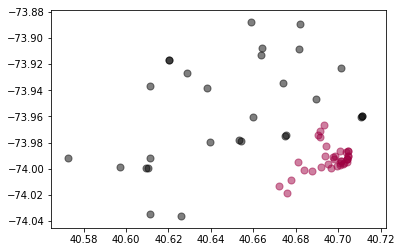

In [143]:
# Plot the points with colors
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    # Plot the datapoints that are clustered
    xy = data_for_cluster[class_member_mask & core_samples_mask][["Venue Latitude", "Venue Longitude"]]
    plt.scatter(xy["Venue Latitude"], xy["Venue Longitude"],s=50, c=[col], marker=u'o', alpha=0.5)

    # Plot the outliers
    xy = data_for_cluster[class_member_mask & ~core_samples_mask]
    plt.scatter(xy["Venue Latitude"], xy["Venue Longitude"],s=50, c=[col], marker=u'o', alpha=0.5)

In [144]:
data_for_cluster.insert(0, 'Çluster Labels', labels)

In [145]:
data_for_cluster

,Çluster Labels,Neighbourhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Suitable for Dogs
79,-1,Bay Ridge,40.625801,-74.030621,Fort Hamtilton Handball Court,40.625991,-74.036298,Park,True
98,-1,Bensonhurst,40.611009,-73.995180,The Wholesome Pet,40.611359,-73.991463,Pet Store,True
100,-1,Bensonhurst,40.611009,-73.995180,18th Ave Bench Park,40.610319,-73.999505,Park,True
105,-1,Bensonhurst,40.611009,-73.995180,Milestone Park,40.609447,-73.999649,Park,True
426,-1,East Flatbush,40.641718,-73.936103,Paerdegat Park,40.638137,-73.938138,Park,True
452,-1,Kensington,40.642382,-73.980421,Dome Playground,40.639449,-73.979834,Park,True
496,-1,Windsor Terrace,40.656946,-73.980073,Thomas J. Cuite Park,40.654339,-73.978756,Park,True
497,-1,Windsor Terrace,40.656946,-73.980073,Seeley Park,40.653420,-73.977818,Park,True
591,-1,Brownsville,40.663950,-73.910235,Steps To A Healthier Brownsville,40.664231,-73.907785,Trail,True
593,-1,Brownsville,40.663950,-73.910235,Betsy Head Memorial Playground,40.663655,-73.913211,Park,True


In [146]:
address = 'Brooklyn, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Brooklyn are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Brooklyn are 40.6501038, -73.9495823.


In [149]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(2)
ys = [i + x + (i*x)**2 for i in range(2)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(data_for_cluster['Venue Latitude'], data_for_cluster['Venue Longitude'], data_for_cluster['Neighbourhood'], labels):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<h1>Results, Discussion and Conclusion</h1>
<p>Both mt</p>